In [2]:
import numpy as np
from keras.models import Sequential # 순차적 모델 컨테이너
from keras.layers import Dense, Activation # 완전연결층, 활성화층
from keras.optimizers import SGD, RMSprop, Adam # 대표 최적화기들(경사하강, RMSprop, Adam)

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0], [1], [1], [0]]) # XOR 


In [3]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='relu'))
# model.add(Dense(units=5, input_shape=(2,), activation='relu'))
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
# (2+1) * 5 → (5+1) * 6 → (5+1) * 1
# 출력층 : 다항분류일 때는 softmax. linear일 떄는 

# print(model.summary())

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) # type: ignore

history = model.fit(x,y, epochs=200, batch_size=1, verbose=0) # type: ignore
loss_metrics = model.evaluate(x, y)
# print(loss_metrics)

pred = (model.predict(x) > 0.5).astype('int32')
# print('예측 결과 :', pred.ravel())
# print(model.weights)
'''
예측 결과 : [1 1 0 0]
[<Variable path=sequential/dense/kernel, shape=(2, 5), dtype=float32, value=[[-0.1865443 -0.3794532  5.463978  -2.7395709  0.498449 ]
 [-0.6862075  3.2495604 -2.5247734  4.4199705  1.8952999]]>, <Variable path=sequential/dense/bias, shape=(5,), dtype=float32, value=[0.         0.29859006 2.5150793  2.7269769  1.3330413 ]>, <Variable path=sequential/dense_1/kernel, shape=(5, 5), dtype=float32, value=[[-1.5554457   0.7184631  -0.99683684 -0.6215169  -0.6476431 ]
 [ 1.7824719  -2.6208186   1.6249694  -1.6652128   2.0909114 ]
 [-6.4173584   4.8285794  -0.223712    2.0676582  -5.919459  ]
 [ 4.3556547  -4.9989257  -0.8999197  -2.1117947   4.101322  ]
 [ 2.0937068   0.91022897  0.5950943   0.6446794   1.610888  ]]>, <Variable path=sequential/dense_1/bias, shape=(5,), dtype=float32, value=[ 0.9704853   0.9678969  -0.36974156  0.22065823  0.89258   ]>, <Variable path=sequential/dense_2/kernel, shape=(5, 1), dtype=float32, value=[[0.1658363 ]
 [0.6590595 ]
 [0.01907321]
 [0.26641613]
 [0.57329494]]>, <Variable path=sequential/dense_2/bias, shape=(1,), dtype=float32, value=[0.19468473]>]
'''

# print(history.history['loss'][:10])
# print(history.history['accuracy'][:10])


/Users/bunny/miniconda3/envs/tf-mac-metal/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-10 19:15:33.385658: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-10 19:15:33.386187: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-10 19:15:33.386201: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-10 19:15:33.386399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-10 19:15:33.386478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.c

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5000 - loss: 0.7132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'\n예측 결과 : [1 1 0 0]\n[<Variable path=sequential/dense/kernel, shape=(2, 5), dtype=float32, value=[[-0.1865443 -0.3794532  5.463978  -2.7395709  0.498449 ]\n [-0.6862075  3.2495604 -2.5247734  4.4199705  1.8952999]]>, <Variable path=sequential/dense/bias, shape=(5,), dtype=float32, value=[0.         0.29859006 2.5150793  2.7269769  1.3330413 ]>, <Variable path=sequential/dense_1/kernel, shape=(5, 5), dtype=float32, value=[[-1.5554457   0.7184631  -0.99683684 -0.6215169  -0.6476431 ]\n [ 1.7824719  -2.6208186   1.6249694  -1.6652128   2.0909114 ]\n [-6.4173584   4.8285794  -0.223712    2.0676582  -5.919459  ]\n [ 4.3556547  -4.9989257  -0.8999197  -2.1117947   4.101322  ]\n [ 2.0937068   0.91022897  0.5950943   0.6446794   1.610888  ]]>, <Variable path=sequential/dense_1/bias, shape=(5,), dtype=float32, value=[ 0.9704853   0.9678969  -0.36974156  0.22065823  0.89258   ]>, <Variable path=sequential/dense_2/kernel, shape=(5, 1), dtype=float32, value=[[0.1658363 ]\n [0.6590595 ]\n [0.01907

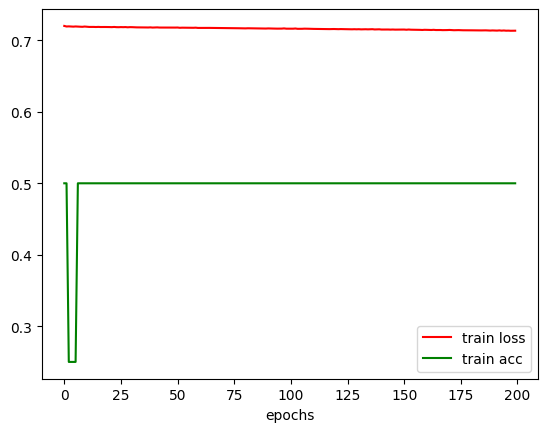

In [4]:
# loss 감소 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss', c='r')
plt.plot(history.history['accuracy'], label='train acc', c='g')
plt.xlabel('epochs')
plt.legend(loc='best')
plt.show()
plt.close()